In [94]:
import warnings

warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report,plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
## Categorical column
customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn

## Numerical column
SeniorCitizen,tenure,MonthlyCharges

In [10]:
## Checking unique values:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
##Separating Categorical columns:-
cat_cols=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat_cols.append(i)
print(cat_cols) 

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [12]:
## Value Counts:
for i in cat_cols:
    print(f"{i}\n")
    print(df[i].value_counts())
    print("--------------------")

customerID

2292-XQWSV    1
7758-UJWYS    1
9715-WZCLW    1
4676-WLUHT    1
7356-AYNJP    1
             ..
0447-RXSGD    1
7521-YXVZY    1
4660-IRIBM    1
1013-QCWAM    1
0856-NAOES    1
Name: customerID, Length: 7043, dtype: int64
--------------------
gender

Male      3555
Female    3488
Name: gender, dtype: int64
--------------------
Partner

No     3641
Yes    3402
Name: Partner, dtype: int64
--------------------
Dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64
--------------------
PhoneService

Yes    6361
No      682
Name: PhoneService, dtype: int64
--------------------
MultipleLines

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
--------------------
InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
--------------------
OnlineSecurity

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurit

In [13]:
## Checking target column value counts:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
321.65      1
424.5       1
574.35      1
6014.85     1
4600.7      1
Name: TotalCharges, Length: 6531, dtype: int64

customerID has 7043 unique values. gender has 2 values Male and Female. SeniorCitizen has 2 values 0 and 1. Partner,Dependents,PhoneService,Churn,PaperlessBilling columns have 2 values,Yes or No. MultipleLines has 3 values No,Yes,and No Phone Service. InternetService has 3 values Fiber optic,DSL and No. OnlineSecurity , OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies have 3 values No,yes,and No internet service. Contract has 3 values :- Month-to-month,Two year and One Year. PaymentMethod has 4 type of values:Electronic check, Mailed check, Bank transfer (automatic) , Credit card (automatic) **TotalCharges has 6531 values.As we can see from value_counts method,there are 11 values of blank space or white space.

In [14]:

## Finding index of columns where blank spaces are present:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Above all 11 rows,TotalCharges has white spaces as value.So first fill it with nan values.

In [15]:
df['TotalCharges'] =df['TotalCharges'].replace(" ",np.nan)

In [16]:
## Again checking for null values:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

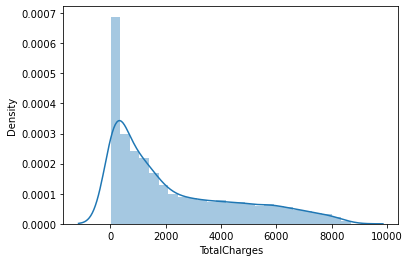

In [17]:
##Checking distribution of data in Total Charges:
sns.distplot(df['TotalCharges'])   

Since TotalCharges datatype is object,so will first convert it's data type to float.

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [19]:
df['TotalCharges'].dtype

dtype('float64')

Now it has changed and data is not very much skewed,so will replace null values with mean.

In [20]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [21]:

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


tenure min values is 0 and max value is 72. MonthlyCharges min value is 18.25 and max value is 118.75. TotalCharges min value is 18.80 and max value is 8684.

# Exploratory data analysis

## Univariate Analysis

<Figure size 1080x720 with 0 Axes>

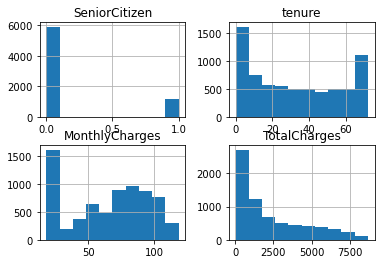

In [24]:
plt.figure(figsize=(15,10))
df.hist()
plt.show()

In [25]:
cat_col=['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


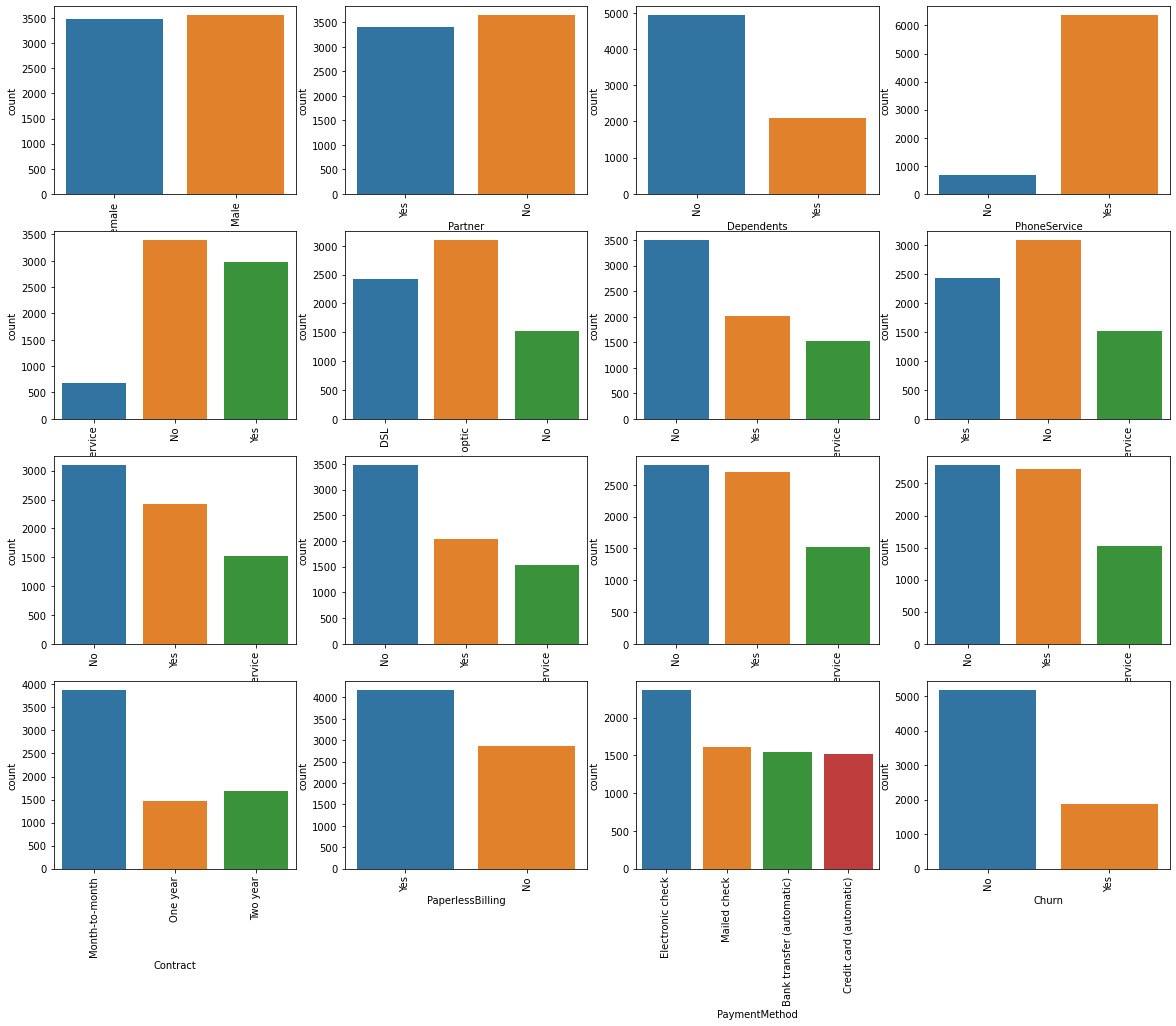

In [50]:
cat_col=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



plt.figure(figsize=(20,20))
graph =1
for i in cat_col:
    if graph <=18:
        ax = plt.subplot(5,4,graph)
        sns.countplot(df[i],)
        plt.xlabel(i)
        plt.xticks(rotation=90)
        graph +=1
plt.show()    

1. In the above count plot we can see that "No Churn" values are way higher than "Yes Churn" data. Since this is our target label it indicates an imbalanced data which will need to be rectified later on.
2. In the above count plot we can see that the total number of male and female gender is almost same still males being at a higher end than female covering the data points in our gender column.
3. In the above count plot we can see that the senior citizen value shows 0 to be not resent and 1 as being a senior citizen. So as we see less number of 1 present in our column it indicates that the number of non senior citizens is quite high than the senior citizens data.
4. In the above count plot we can see that the partner details are almost similar indicating that people with no partner are a bit higher than people who have partners.
5. In the above count plot we can see that people with dependents are way less that people who do not have anyone dependent on them.
6. In the above count plot we can see that people with a phone service cover a large data chunk while there are only few people who do not own a phone service.
7. In the above count plot we can see that people who prefer paper less billing are high in number however we still have a huge number of people who prefer the traditional way of receiving a paper bill.
8. In the above count plot we can see that people with single line are higher in number than people who have multiple lines but we also see a minority of people who do not own a phone service yet.
9. In the above count plot we can see that majority of people have chosen to get a high speed fibre optic internet but there are many people who do not own an internet service at all
10. In the above count plot we can see that people who do not have any internet service obviously do not need any online security either but there is a huge number in people who own an internet service but do not use any online security yet.
11. In the above count plot we can see that just like people with no internet service and online security the same chunk of folks have no online backup usage either. But the difference between people who use internet and do not have online backup vs people who use online back up is relatively lesser as compared to online security details.
12. In the above count plot we can see that people without any device protection is higher in number as compared to people who have some kind of device protection.
13. In the above count plot we can see that people who do not need technical support is higher in number as compared to people who need technical assistance.
14. In the above count plot we can see that people who do not use streaming TV service is slightly higher than the people who do use streaming TV service.
15. In the above count plot we can see that just like streaming TV service there are people who do not stream movies a slight higher than people who do enjoy streaming movies online.
16. In the above count plot we can see that there are a lot of people who prefer the month to month contract over the 1 year or 2 year contract term.
17. In the above count plot we can see that the preferred payment amount by people is the electronic check. While people using the mailed check, automatic bank transfer and automatic credit card debit option fall in a similar range of numbers

# Bi-Variate Analysis

<Figure size 720x432 with 0 Axes>

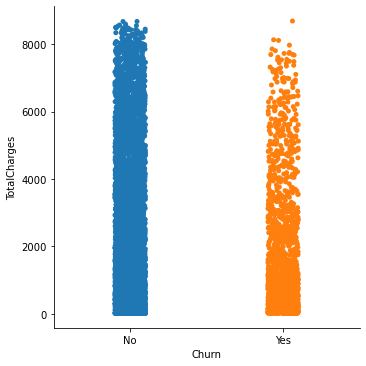

In [48]:
plt.figure(figsize=[10,6])
sns.catplot(x='Churn',y='TotalCharges',data=df)

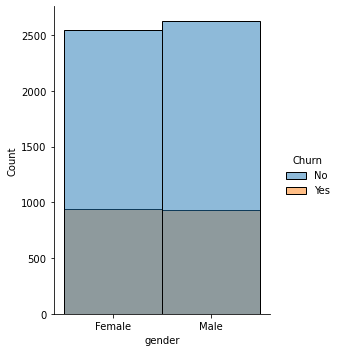

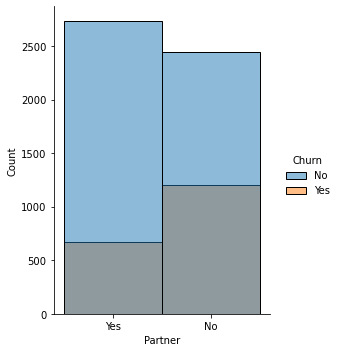

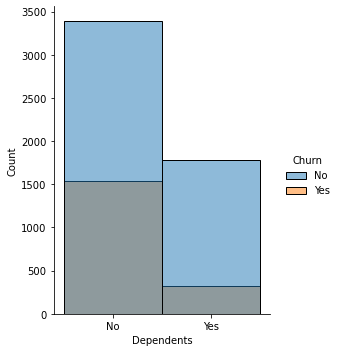

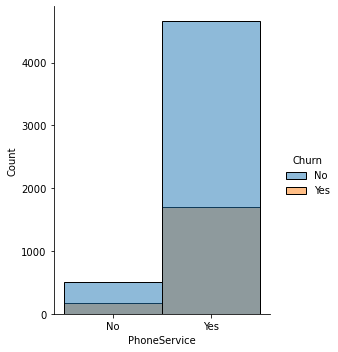

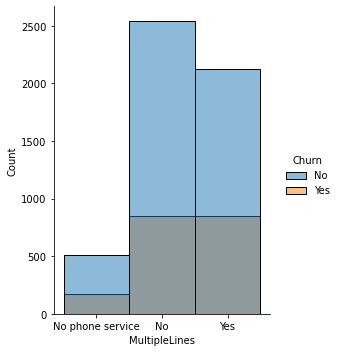

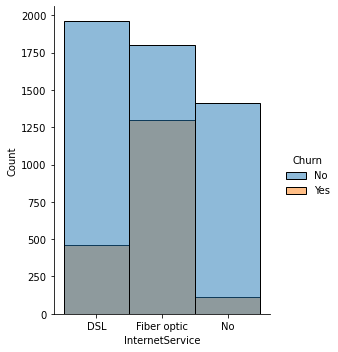

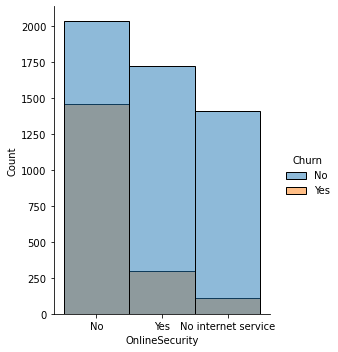

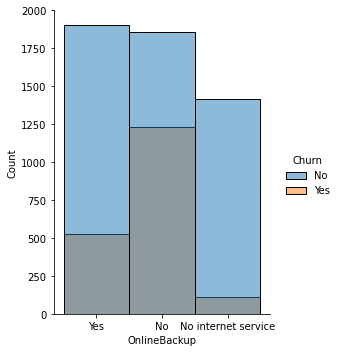

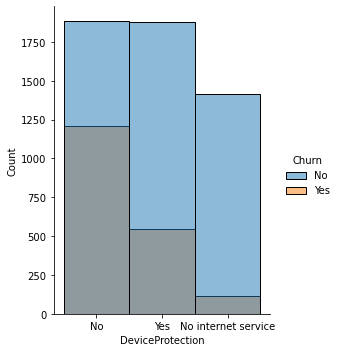

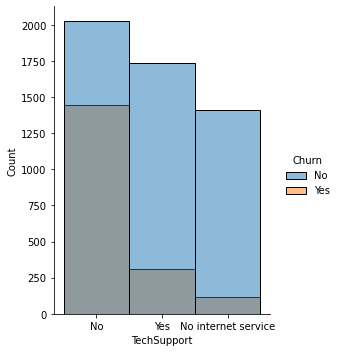

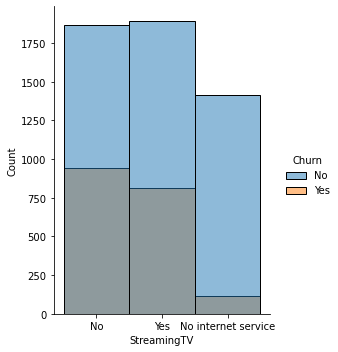

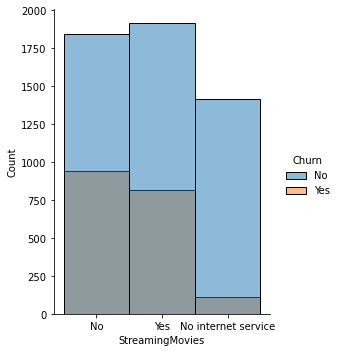

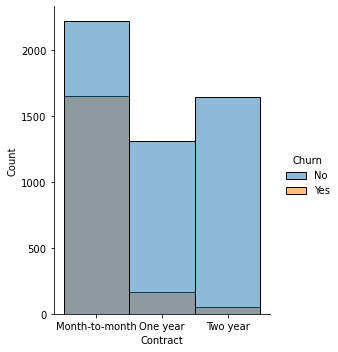

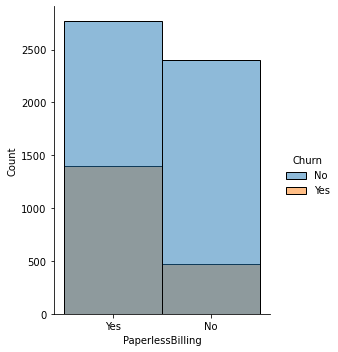

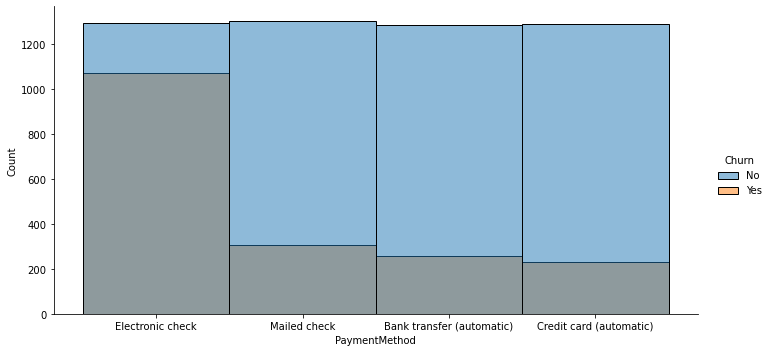

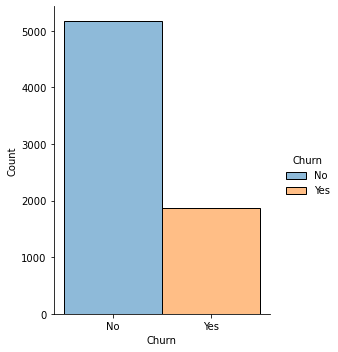

In [52]:
cat_col=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


for col in cat_col:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, hue='Churn', data=df, element="bars", aspect=aspect_ratio)

With the help of above bar plot we can identify the No churn and Yes churn data and understand that the "Yes Churn" option has been significantly lower than it counterpart. 

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

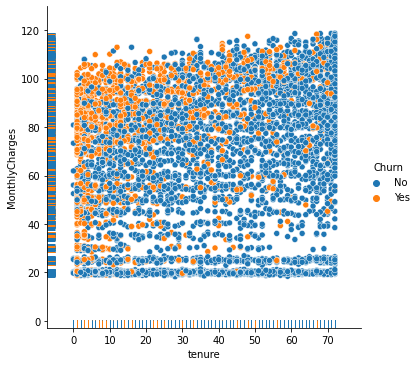

In [53]:
sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

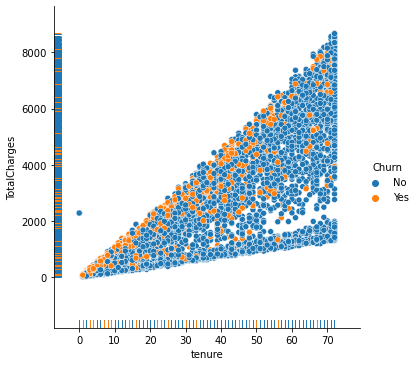

In [54]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)


The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

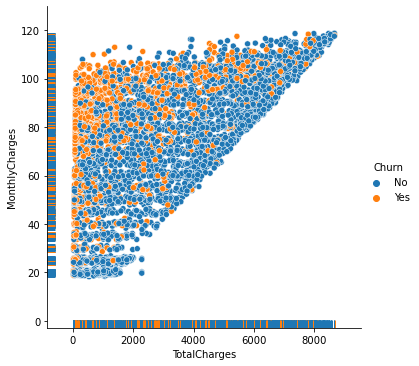

In [55]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

# Data-Preprocessing

In [56]:
#we can drop-off customerid as it cant effect the target column
df.drop("customerID", axis=1, inplace=True)

# Encoding

In [57]:
# Label Encoder

le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


I have used LabelEncoder to convert the object data type in our label column "Churn" into a numerical format.

In [58]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


I have used OrdinalEncoder inside a function to loop through all the categorical data columns and covert those feature values from object data type to numerical data type values.

In [60]:
print(f"Shape of our data frame post encoding is", df.shape)
df.isnull().sum()

Shape of our data frame post encoding is (7043, 20)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
Checking outliers

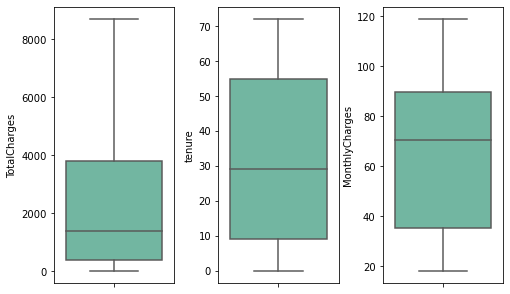

In [63]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[ ['TotalCharges', 'tenure', 'MonthlyCharges']].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the usage of box plot we tried to check for outliers in our continous data columns and we found no outliers in them. Since we do not have to worry about any outliers in categorical column we won't have to fix any outlier concerns in our dataset.

# Checking Skewness

In [65]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value. However most of those are categorical columns and we do not have to worry about outliers or skewness in catagorical data therefore we will ignore it. Having said that we will treat the skewness that is present in our continous data columns.

In [68]:
for col in ['TotalCharges', 'tenure', 'MonthlyCharges']:
    if df.skew().loc[col]>0.5:
        df[col]=power_transform(df[col].values.reshape(-1,1))

In [69]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.144899
Churn               1.063031
dtype: float64

# Seperating Labels and features

In [70]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [71]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

we see that 0's are more than 1's.

# Resolving the class imbalance issue in our label column

In [72]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [73]:
Y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Feature Scaling

In [74]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.057941,-0.514551,1.177505,-0.604024,-1.114170,-3.217715,0.030606,-1.278093,-0.786557,1.360212,-0.929577,-0.793312,-1.075478,-1.085915,-0.670030,0.762154,0.356346,-1.328014,-1.660898
1,1.033068,-0.514551,-0.917110,-0.604024,0.258471,0.315949,-1.034138,-1.278093,1.640942,-0.934194,1.359607,-0.793312,-1.075478,-1.085915,0.639868,-1.394953,1.374703,-0.387766,0.366386
2,1.033068,-0.514551,-0.917110,-0.604024,-1.072575,0.315949,-1.034138,-1.278093,1.640942,1.360212,-0.929577,-0.793312,-1.075478,-1.085915,-0.670030,0.762154,1.374703,-0.495322,-1.245090
3,1.033068,-0.514551,-0.917110,-0.604024,0.716018,-3.217715,0.030606,-1.278093,1.640942,-0.934194,1.359607,1.630009,-1.075478,-1.085915,0.639868,-1.394953,-1.680369,-0.896055,0.345700
4,-1.057941,-0.514551,-0.917110,-0.604024,-1.072575,0.315949,-1.034138,0.210977,-0.786557,-0.934194,-0.929577,-0.793312,-1.075478,-1.085915,-0.670030,0.762154,0.356346,0.089297,-1.110372


# Finding best random state for building our Classification Models

In [75]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 79.35833011209895 on Random State 503


In [79]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=503)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [80]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      1328
           1       0.76      0.83      0.80      1259

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.80      0.79      0.79      2587

Accuracy Score: 79.35833011209895
Cross Validation Score: 76.9812343707315

Accuracy Score - Cross Validation Score is 2.377095741367455


In [81]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1328
           1       0.82      0.85      0.83      1259

    accuracy                           0.84      2587
   macro avg       0.84      0.84      0.84      2587
weighted avg       0.84      0.84      0.84      2587

Accuracy Score: 83.53304986470815
Cross Validation Score: 81.98776976905457

Accuracy Score - Cross Validation Score is 1.545280095653581


In [82]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1328
           1       0.78      0.82      0.80      1259

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587

Accuracy Score: 80.13142636258213
Cross Validation Score: 80.72201791805884

Accuracy Score - Cross Validation Score is -0.5905915554767063


In [83]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      1328
           1       0.86      0.87      0.87      1259

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587

Accuracy Score: 86.93467336683418
Cross Validation Score: 85.03228472762169

Accuracy Score - Cross Validation Score is 1.9023886392124894


In [84]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.64      0.74      1328
           1       0.70      0.91      0.79      1259

    accuracy                           0.77      2587
   macro avg       0.79      0.77      0.77      2587
weighted avg       0.79      0.77      0.76      2587

Accuracy Score: 76.8457672980286
Cross Validation Score: 76.96194338790005

Accuracy Score - Cross Validation Score is -0.11617608987144479


In [85]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1328
           1       0.87      0.84      0.86      1259

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

Accuracy Score: 86.4321608040201
Cross Validation Score: 83.65069825325777

Accuracy Score - Cross Validation Score is 2.7814625507623276


Random forest is giving best crossvalidation score

# Hyper parameter tuning on the best Classification ML Model

In [86]:
param_grid={'max_features': ['auto','sqrt','log2'],
            'max_depth':[6,7,8,50],'criterion':['gini','entropy']}

In [87]:
GCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy')

In [89]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 50],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [90]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt'}

In [91]:
rf=RandomForestClassifier(max_features='sqrt',criterion='entropy',max_depth=50)
rf.fit(X_train, Y_train)
fmod_pred=rf.predict(X_test)
acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", acc)

Accuracy score for the Best Model is: 86.85736374178586


In [92]:
# Classification Report
class_report = classification_report(Y_test, fmod_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1308
           1       0.88      0.86      0.87      1279

    accuracy                           0.87      2587
   macro avg       0.87      0.87      0.87      2587
weighted avg       0.87      0.87      0.87      2587



I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

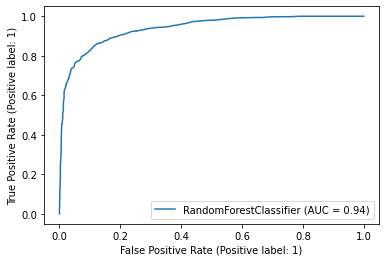

In [95]:
plot_roc_curve(rf,X_test,Y_test)

Area Under Curve is 94% for RandomForest

# Saving the model

In [97]:
filename = "CustomerChurnAnalysis.pkl"
joblib.dump(rf, filename)

['CustomerChurnAnalysis.pkl']